In [ ]:
#hide
from simplydrug.core import *

# Simplydrug

This repository contains functions and beginner-level iPython notebook tutorials for the analysis of early Drug Discovery experiments. The notebooks are built in a sequence provide a hands-on introduction to Drug Discovery, explaining the basics of experimental design, QC, and high throughput biological data analysis.
<img style="float: left; margin-right:700px"  width="550" src="hts_notebooks/hts_images/bcdd.png" >

## Objective

<div align="justify"> Integrative technological breakthroughs are based on effective scientific communication. The development of integrative workflows using the mainstream Software as a service (SaaS) distribution model is usually not feasible for academic labs, small teams, students, and drug discovery enthusiasts. To advance integrative drug discovery, we developed a set of open-source lightweight modular analysis workflows. These workflows describe the early stages of biological assay development and high throughput screening and provide a hands-on introduction to Drug Discovery for everybody with basic knowledge of biology, python programming, or data science. </div>

## List of notebooks

The notebooks are built in a sequence and gradually introduce concepts of experimental design, QC, and data analysis of different biological assays.
 
 * __01a_enzyme_kinetics.ipynb__   
Topics: enzyme kinetics, enzyme assays, fluorometry, assay variability and confidence intervals, Z-factor, Z-score based normalization, plate heatmap, hit extraction, molecule visualization, importing molecule bioactivity data.
 
 
 * __01b_enzyme_kinetics_chain.ipynb__    
Topics: Running enzymatic assay for a number of plates, generating screen hit matrix, plot for all the plates in the screen.     


 
 * __02a_ion_channel_development.ipynb__            
Topics: Introduction to ion channels and assay development, ion flux assay normalization, ion channel kinetics time-series.


 
 * __02b_ion_channel_cherry_picking.ipynb__      
 Topics: Calcium influx assay, cherry picking, percent of activation or inhibition.      
 
 
 
 * __02c_ion_channel_dose_response.ipynb__     
Topics: Introduction to dose-response, Hill equation.   
   
 
 * __03a_yeast_growth_screen.ipynb__  
 Topics: Running yeast growth assay, growth curve, growth score, filtering out aberrant curves.
 
 
 * __03b_yeast_growth_in_chain.ipynb__    
 Topics: Running yeast growth assay for a number of plates, filtering, generating screen hit matrix, plotting all the plates in the screen.     
  
   
 * __03c_yeast_cherry_picking.ipynb__    
Topics: Running yeast growth assay with different doses of the compounds. Generation of automatic ppt report.

  
 * __04a_imaging_screen.ipynb__   
 Topics: High-content screening and image analysis, reporter system, cell viability, systematic errors detection and correction. 
 
 
 * __4b_imaging_assay_development.ipynb__ 
 Topics: Exploration data anslysdis, PCA, Batch effect.
 
 
 
 * __04c_imaging_dose_response.ipynb__     
 Topics: Activity versus viability, fitting dose-response for imaging data. 
 
 
 * __05_xtt_assay.ipynb__  
Dose-response assay for compound toxicity.

## Install

pip install simplydrug     

or clone this repository

    git clone https://github.com/disc04/simplydrug

## Dependencies

The codebase relies on the following dependencies (tested version provided in parentheses):

 - python (3.6.1)
 - rdkit (2019.09.3)
 - pubchempy (1.0.4)
 - scipy (1.4.1)
 - seaborn (0.10.0)
 - python-pptx (0.6.18)
 - wget(3.2)
 - xlrd (1.2.0)

## Example usage

<div align="justify"> In each experiment, first, we merge numerical data coming from equipment with the plate layout (descriptors). We describe the experimental design in a layout excel file, and the names of the excel sheets become the names of the columns in a final data table. Each excel sheet contains a table with dimensions of the experiment plate (usually 96 or 384-well plates) and represents some aspect of the layout  -  well ID, treatment, cell density, compound ID, compound concentration, etc.</div> 

<div align="justify"> The layout file must contain sheets named  'Well' and 'Status'. The 'Well' table lists well IDs, and the 'Status' can contain either 'Sample', 'Positive' or 'Negative' control, or 'Reference' values. 'Reference' wells are excluded from calculations. The function add_layout merges measurements and layout by the 'Well' column.</div>

In [2]:
import pandas as pd

data = pd.DataFrame(pd.ExcelFile('hts_notebooks//hts_data//enzyme_kinetics_data1.xlsx').parse(0))[['Well','0s','120s','240s', '360s']]
layout_path = 'hts_notebooks//hts_data//enzyme_kinetics_layout.xlsx'
chem_path = 'hts_notebooks//hts_data//compounds//example_chemicals.csv'
chem_plate = 'ex_plate1'

results = add_layout(data, layout_path, chem_path = chem_path, chem_plate = chem_plate)
display(results.head())


Added  Well
Added  Status
Added compounds:  ex_plate1 



,Well,0s,120s,240s,360s,Status,Plate,Compound_id,lib_name,SMILES,Compound Name,SecName
0,A1,798,910,977,1090,Negative,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,469,459,463,486,Positive,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,446,470,485,523,Sample,ex_plate1,Compound_0001,example_library,Cc1nn(C)c2nc(C(C)C)cc(C(=O)N3CCN(C(=O)C4CC4)CC...,NaN,NaN
3,A4,532,581,632,710,Sample,ex_plate1,Compound_0002,example_library,CCOC(=O)c1c(S(=O)(=O)N2CCOCC2)c(-c2ccccc2)n(-c...,NaN,NaN
4,A5,549,631,676,743,Sample,ex_plate1,Compound_0003,example_library,Cn1nc(-c2ccc(C=C(C#N)S(=O)(=O)c3ccc(C(F)(F)F)c...,NaN,NaN


To check our 386 well plate for systematic errors, we often use heatmap representation:

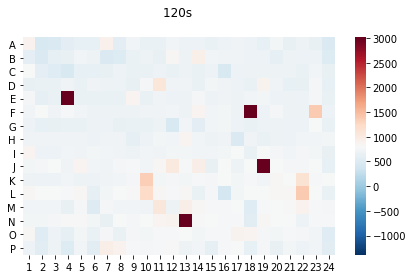

In [3]:
hts_heatmap(df = results, layout_path = layout_path, features = ['120s'], path = None)

<div align="justify"> In this plate, most of the readings across the plate are close to the plate average, and four wells with high readings probably represent our hit compounds.</div>